##                            Temprature and Humidity DHT22

### Temperature predict on the basis of Humidity

#### import Libraries

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [43]:
weatherData = pd.read_csv('weatherdata.csv')
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       96453 non-null  float64
 1   Humidity              96453 non-null  float64
 2   Wind Speed (km/h)     96453 non-null  float64
 3   Pressure (millibars)  96453 non-null  float64
dtypes: float64(4)
memory usage: 2.9 MB


#### Data Information

In [44]:
weatherData.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,1003.235956
std,9.551546,0.195473,6.913571,116.969906
min,-21.822222,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,1011.900000
50%,12.000000,0.780000,9.965900,1016.450000
75%,18.838889,0.890000,14.135800,1021.090000
max,39.905556,1.000000,63.852600,1046.380000


####  Data Visualtization and Basic Analysis

<AxesSubplot: xlabel='Temperature (C)', ylabel='Humidity'>

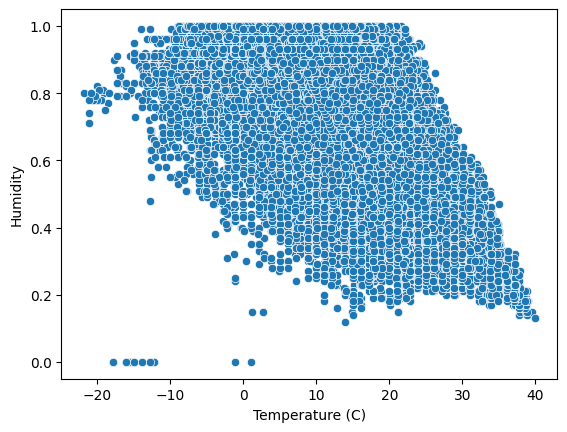

In [45]:
sns.scatterplot(x='Temperature (C)',y='Humidity',data=weatherData)

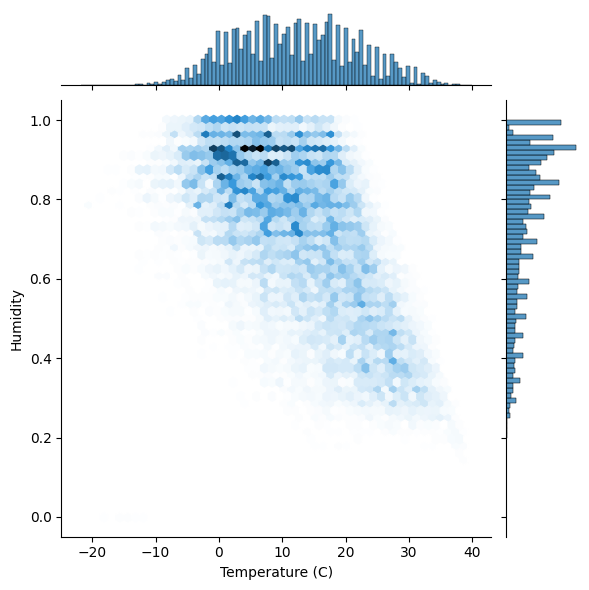

In [46]:
sns.jointplot(x='Temperature (C)',y='Humidity',data=weatherData,kind='hex')

<AxesSubplot: xlabel='Temperature (C)', ylabel='Density'>

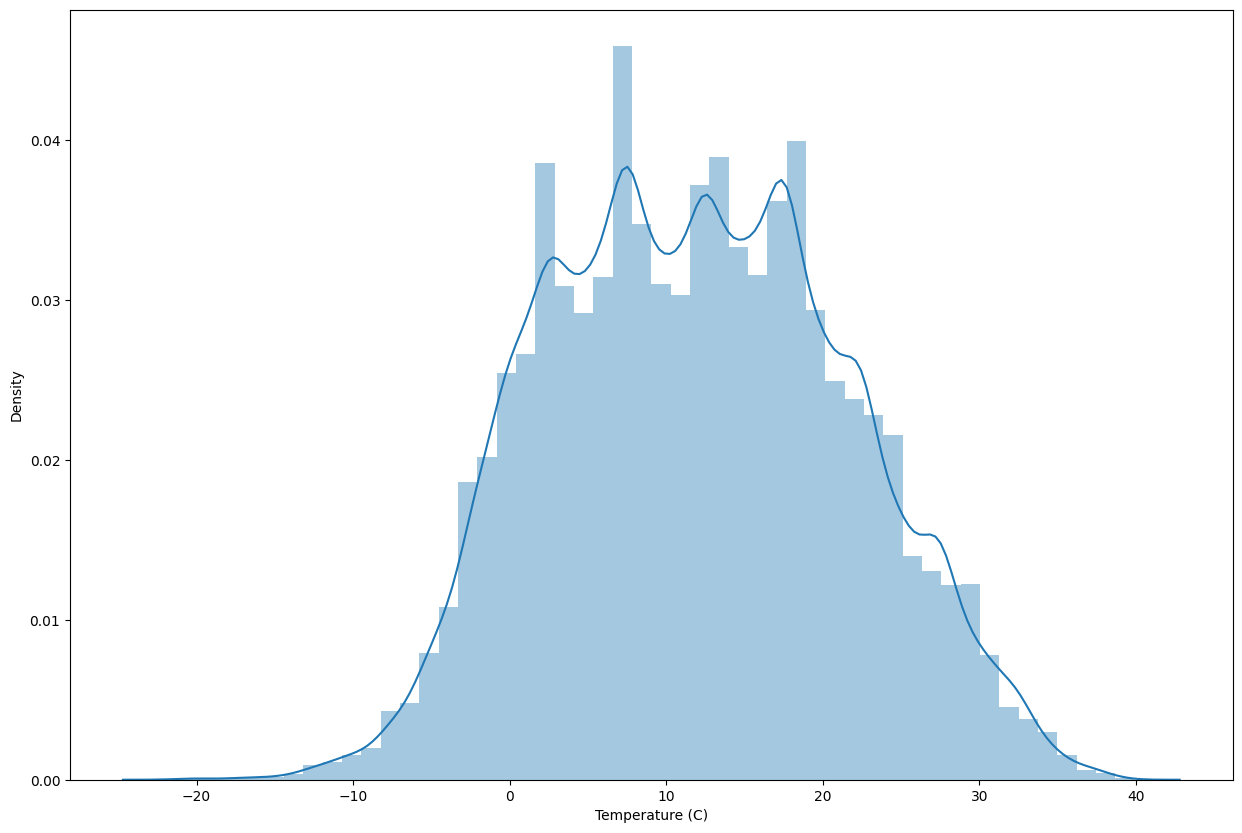

In [47]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(weatherData['Temperature (C)'])

<AxesSubplot: >

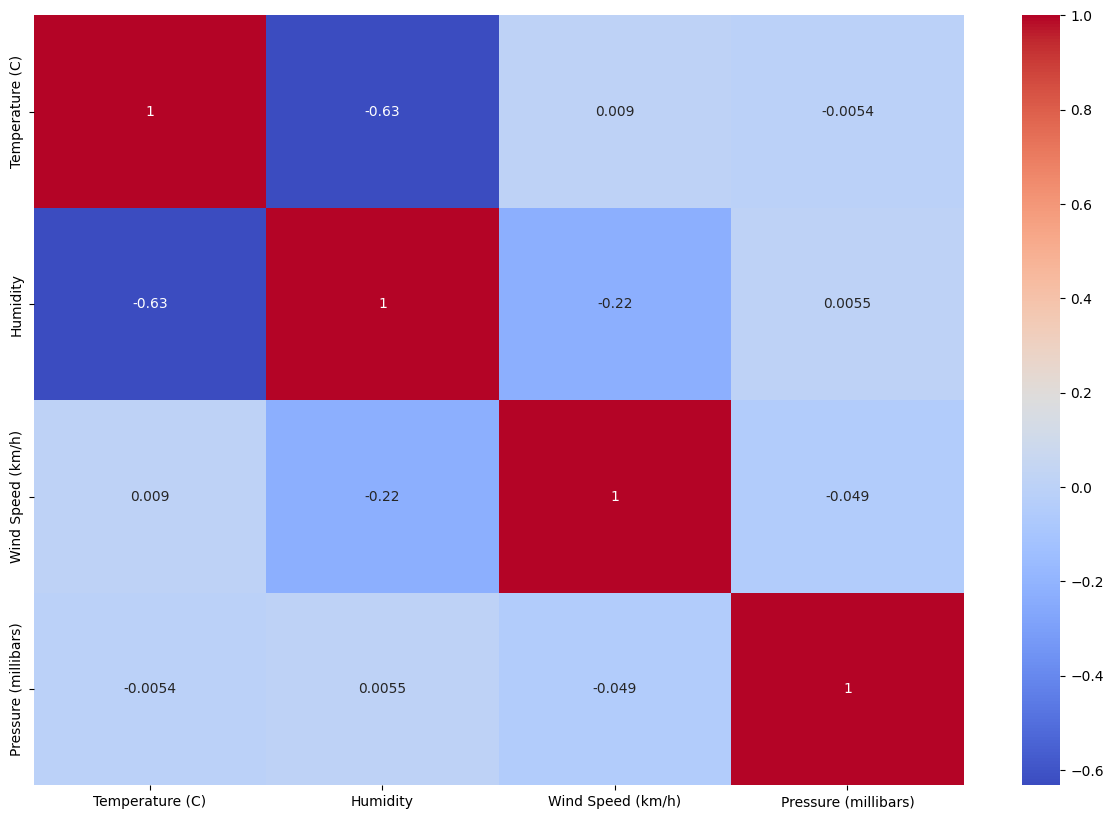

In [48]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstace.heatmap(weatherData.corr(),annot=True,cmap = 'coolwarm')

## Making prediction

In [50]:
X_Features = weatherData[['Humidity']]
Y_Prediction = weatherData[['Temperature (C)']]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_Features, Y_Prediction, test_size=0.40, random_state=101)

In [53]:
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [54]:
LR.intercept_

array([34.66142909])

In [55]:
LR.coef_

array([[-30.86498611]])

In [57]:
coefficientInformation = pd.DataFrame(data=LR.coef_,index=X_train.columns,columns=['Co-Efficient Values'])
coefficientInformation

,Co-Efficient Values
Humidity,-30.864986


In [58]:
Temp_pred = LR.predict(X_test)
Temp_pred

array([[12.4386391 ],
       [ 5.03104243],
       [ 7.80889118],
       ...,
       [14.90783798],
       [24.78463354],
       [15.21648784]])

### Check the Difference between actual and predicted values in a scatter graph.

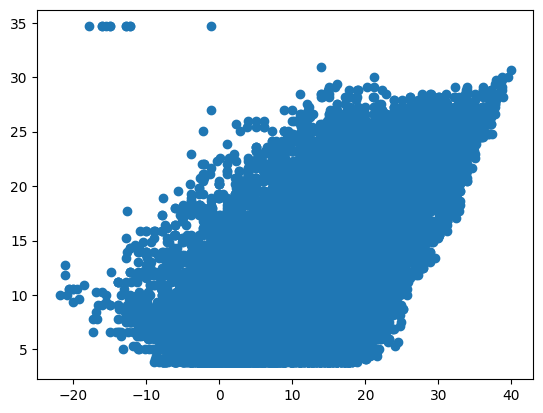

In [60]:
plt.scatter(y_test,Temp_pred)

### Check the Distributations of the Residuals.

<AxesSubplot: ylabel='Density'>

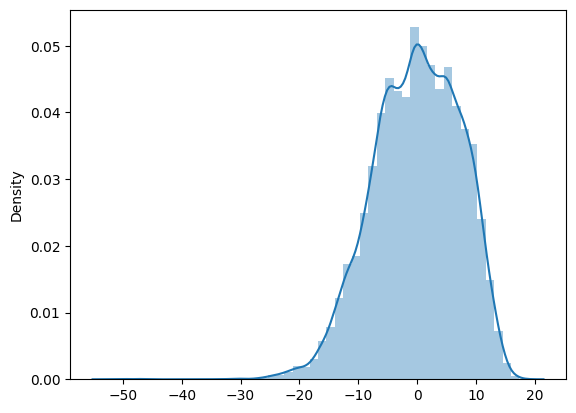

In [61]:
sns.distplot(y_test-Temp_pred)

## As from Distributation Graph above we can conclude that there is nearly normal distributation.

#### Let's Do somework for the Errors.

In [62]:
metrics.mean_absolute_error(y_test,Temp_pred)

6.015928911872608

In [63]:
metrics.mean_squared_error(y_test,Temp_pred)

54.610397511477

In [66]:
np.sqrt(metrics.mean_squared_error(y_test,Temp_pred))

7.389884810433583

### Recall the Value of CoEfficient again here

In [67]:
coefficientInformation

,Co-Efficient Values
Humidity,-30.864986


## This means that if humidity is increased by one unit the Temperature will Reduce by 30.864986 units.